# Linear regression

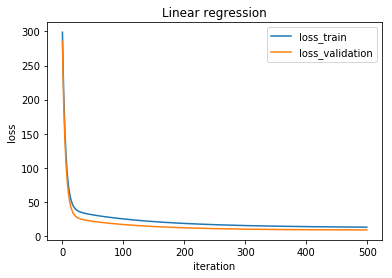

13.0895323848
9.06048436574


In [52]:
#linear regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

#read the data
housing_path = './housing_scale.txt'
X, y = load_svmlight_file(housing_path)

#add 1 for each row
X = X.toarray()
row,col=X.shape
X=np.column_stack((X,np.ones(row)))

#divide data into training and validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=30)

#initialize by zeros
W = np.zeros(col+1)

#define learn rate and itreation, loss array
learn_rate = 0.02
iteration = 500

loss_train = np.zeros(interation)
loss_validation = np.zeros(interation)

#loss function
def get_loss(X, W, y):
    diff = y - np.dot(X, W)
    loss = np.dot(diff,diff.T) / (2 * X.shape[0])
    return loss

#gradient function
def get_gradient(X, W, y):
    diff = y - np.dot(X, W)
    G = - np.dot(diff,X)/ X.shape[0]
    return G

#start interation
for i in range(iteration):
    # get loss
    loss_train[i] = get_loss(X_train, W, y_train)
    loss_validation[i] = get_loss(X_validation, W, y_validation)
    
    #get gradient and update W
    G = get_gradient(X_train, W, y_train)
    W = W - learn_rate * G

#draw the result
plt.plot(loss_train,label="loss_train")  
plt.plot(loss_validation,label="loss_validation")  
plt.legend()  
plt.xlabel("iteration")  
plt.ylabel("loss")  
plt.title("Linear regression")  
plt.show()
print(loss_train[iteration-1])
print(loss_validation[iteration-1])

